# Problems Notebook

<p>Computer Infrastructure </p>   <p>Author: Gerry Callaghan</p>

### Problem 1: Data from yfinance

In [32]:
# Dates and times - we will use this package to allow us format dates into strings for filenames.
import datetime as dt

# data frames - we will use pandas to handle tabular data imported from Yahoo Finance.
import pandas as pd

# plot graphs - we will use matplotlib to plot graphs.
import matplotlib.pyplot as plt 

# Yahoo Finance is not part of the cental python repository 
# but is an open-source package available that can be installed via conda-forge.
# This is where we import the yfinance package to allow us to download stock data.
import yfinance as yf


# There are known issues with yfinance and the default user-agent, so i need to spoof my user-agent
# You can read more about this issue here:
# url= "https://www.reddit.com/r/learnpython/comments/1kc3miq/yfinance_error_yfratelimiterrortoo_many_requests/"
# Details on how requests from the curl_cffi package can be imported url ="https://pypi.org/project/curl-cffi/"
import curl_cffi.requests as requests
session = requests.Session(impersonate="chrome")


In [30]:
'''
# Let's write a function called get_data() that will download stock data from Yahoo Finance.
# The function will take our "Fangs" stock ticker symbols as input, and return a pandas DataFrame
# containing the stock data for that ticker.
'''

# From here URL= "https://ranaroussi.github.io/yfinance/", 
# it says that for multiple tickers we need only have whitespace between each ticker symbol.
# That is, it takes a single string with spaces between each ticker symbol.
# So, our function looks like this, remember we are passing in our session object to avoid user-agent issues.
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG', session=session)


In [29]:
# Let's now confirm that indeed yfinance has understood our ticker symbols
#tickers.tickers['META'].info

In [33]:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', session=session)


#in the previous command, we had no comma between the stock tickers, 
#but here, because they are in a tuple, we do, and each have apostrophes to indicate they are strings
# the function is download(),and we it takes variables, ticker/tickers and period

# What is the period, 5 days in our case. From URL= "https://algotrading101.com/learn/yfinance-guide/" 5 days is '5d', 
# while we want hourly data, so we set interval='1h' for 1 hour intervals.
#df

Failed to get ticker 'NFLX' reason: 'str' object has no attribute 'name'
[                       0%                       ]Failed to get ticker 'META' reason: 'str' object has no attribute 'name'
[**********************60%****                   ]  3 of 5 completedFailed to get ticker 'AMZN' reason: 'str' object has no attribute 'name'
[*********************100%***********************]  5 of 5 completed

5 Failed downloads:
['NFLX', 'GOOG', 'META', 'AAPL', 'AMZN']: AttributeError("'str' object has no attribute 'name'")


In [12]:
df = yf.download(['MSFT','AAPL', 'GOOG'],period='1mo')
# details of this function can be found here https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# it says the format of the command is
# yfinance.download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=None, 
# back_adjust=False, repair=False, keepna=False, progress=True, period=None, interval='1d', prepost=False, proxy=<object object>, 
# rounding=False, timeout=10, session=None, multi_level_index=True) 

# We want to have a copy of the data, copy it to a dataframe called df

[*********************100%***********************]  2 of 3 completed

3 Failed downloads:
['AAPL', 'MSFT', 'GOOG']: AttributeError("'str' object has no attribute 'name'")


In [13]:
df

Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, GOOG), (Adj Close, MSFT), (Close, AAPL), (Close, GOOG), (Close, MSFT), (High, AAPL), (High, GOOG), (High, MSFT), (Low, AAPL), (Low, GOOG), (Low, MSFT), (Open, AAPL), (Open, GOOG), (Open, MSFT), (Volume, AAPL), (Volume, GOOG), (Volume, MSFT)]
Index: []

In [15]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# print data as CSV file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
#print(df.to_csv('../data/data.csv'))


None


## Dates and Times

In [24]:
# Current date and time
now = dt.datetime.now()
# docs.python.org/3/library/datetime.html#format-codes 
print(f"{now}")


2025-10-18 21:23:48.462617


In [27]:
# Format date and time
print(now.strftime("%Y-%m-%d %H:%M:%S"))
# docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
print(now.strftime("%Y%m%d-%H%M%S"))



2025-10-18 21:23:48
20251018-212348


In [29]:
# File name
"../data/" + now.strftime('%Y%m%d-%H%M%S')+'.csv'

'../data/20251018-212348.csv'

In [31]:
# print(df.to_csv("../data/" + now.strftime('%Y%m%d-%H%M%S')+'.csv'))

print(df.to_csv("../data/" + dt.datetime.now().strftime('%Y%m%d-%H%M%S')+'.csv'))

None


In [17]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'GOOG'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'GOOG'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'GOOG'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'GOOG'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [18]:
df.index
# this tells us all the values for the x-axis, which is date and time stamps


DatetimeIndex(['2025-09-18', '2025-09-19', '2025-09-22', '2025-09-23',
               '2025-09-24', '2025-09-25', '2025-09-26', '2025-09-29',
               '2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03',
               '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09',
               '2025-10-10', '2025-10-13', '2025-10-14', '2025-10-15',
               '2025-10-16', '2025-10-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

<Axes: xlabel='Date'>

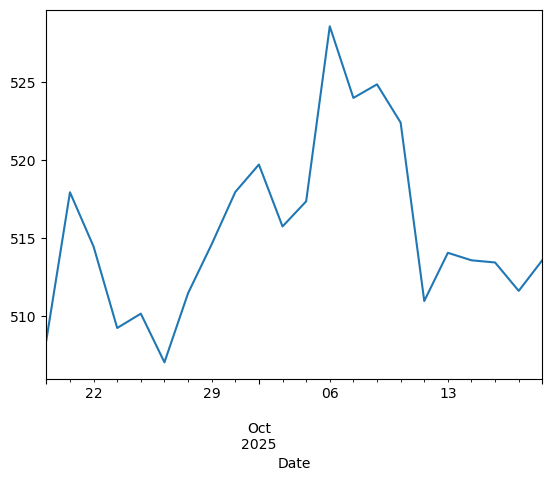

In [19]:
df[('Close','MSFT')].plot()
#so this plot the closing price for MSFT for one month (October 2025)

# end